# Laporan Survei Kampanye California

`Faisal Kengo (FTDS Remote 014)`

**Link:** https://milestone1-faisalkengo.herokuapp.com/

## Perkenalan

Halo, nama saya Faisal Kengo. Kali ini saya disewa oleh seorang calon pejabat legislatif di California untuk memperikakan beberapa faktor tertentu terkait dengan kampanye yang ingin ia lakukan. Panggil saja orang ini dengan sebutan "Mr. X" (bukan nama sebenarnya). Mr. X meminta saya untuk mencari tahu bagaimana demografi dari orang yang mengonsumsi iklan kampanye seperti apa, apa media yang paling sering digunakan, bagaimana impresinya, dan berapa rata-rata biaya yang harus dikeluarkan untuk melakukan kampanye ini.

### Tujuan

Seperti yang sudah saya jabarkan di awal, saya diminta untuk melakukan hal-hal berikut:

1. Menganalisa demografi audiens kampanye di California berdasarkan umur dan jenis kelaminnya,
2. Mencari tahu media apa yang paling sering digunakan untuk melakukan kampanye di California,
3. Mencari tahu berapa lama suatu kampanye dilakukan di California berdasarkan medianya,
4. Mencari tahu seberapa besar indeks impresi dari kampanye yang dilakukan di California,
5. Mencari tahu berapa biaya yang harus dikeluarkan per bulannya untuk melakukan kampanye,
6. Menganalisa apakah anggaran biaya untuk iklan kampanye sebesar 100 USD per hari dapat memenuhi kebutuhan kampanye.

### Permasalahan

Kali ini, kita tidak memiliki petunjuk apapun untuk mengolah data yang akan kita gunakan. Kita hanya diminta untuk menarik data dari `bigquery-public-data.google_political_ads`. Maka kita harus mencari tahu terlebih dahulu data apa saja yang ingin digunakan.

Setelah itu, kita harus membuat minimal 4 buah visualisasi data, 1 buah visualisasi statistika deskriptif, dan 1 buah visualisasi statistika inferensial yang nantinya akan ditampilkan dalam bentuk *dashboard* yang akan di-*upload* ke situs heroku.

## Penjelasan Mengenai Analisa Kampanye di California

### Pembersihan dan Eksplorasi Data

Sebelum kita memulai pengolahan data, kita perlu mengambil terlebih dahulu data yang akan kita olah. Kita akan ambil data dari Google Cloud Platform dengan perintah seperti berikut:

---

    SELECT `bigquery-public-data.google_political_ads.creative_stats`.advertiser_id, `bigquery-public-data.google_political_ads.creative_stats`.advertiser_name, country, country_subdivision_primary, ad_type, num_of_days, impressions, age_targeting, gender_targeting, `bigquery-public-data.google_political_ads.creative_stats`.spend_usd, spend_range_min_usd, spend_range_max_usd
        
    FROM `bigquery-public-data.google_political_ads.creative_stats`
        
    JOIN `bigquery-public-data.google_political_ads.advertiser_geo_spend` ON `bigquery-public-data.google_political_ads.creative_stats`.advertiser_id = `bigquery-public-data.google_political_ads.advertiser_geo_spend`.advertiser_id

    WHERE country = "US" AND country_subdivision_primary = "CA";

---

Setelah itu, kita akan muat *library* yang akan kita gunakan untuk mengolah data yang ingin kita analisa (*library* Streamlit tidak akan kita gunakan di dalam *notebook*).

In [83]:
# Load library yang dibutuhkan

#import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Lalu kita akan muat data yang akan kita analisa, dan kita akan tampilkan bagian awal dan akhir dari data tersebut

In [3]:
df = pd.read_csv("h8dsft_P0ML1_FaisalKengo.csv")

In [4]:
df.head()

,advertiser_id,advertiser_name,country,country_subdivision_primary,ad_type,num_of_days,impressions,age_targeting,gender_targeting,spend_usd,spend_range_min_usd,spend_range_max_usd
0,AR00887684527932047361,STEVE DAINES FOR MONTANA,US,CA,IMAGE,107,8000-9000,NaN,Unknown gender,NaN,0,100
1,AR00887684527932047361,STEVE DAINES FOR MONTANA,US,CA,IMAGE,136,60000-70000,NaN,Unknown gender,NaN,0,100
2,AR00887684527932047361,STEVE DAINES FOR MONTANA,US,CA,IMAGE,123,100000-125000,NaN,Unknown gender,NaN,100,200
3,AR01527195675018657793,THE COMMITTEE TO DEFEND THE PRESIDENT,US,CA,IMAGE,5,1000-2000,"25-34, 45-54, 55-64, ≥65, Unknown age",NaN,NaN,0,100
4,AR03136609393588568065,DNC SERVICES CORP / DEMOCRATIC NATIONAL COMMITTEE,US,CA,TEXT,2,0-1000,NaN,NaN,NaN,0,100


In [5]:
df.tail()

,advertiser_id,advertiser_name,country,country_subdivision_primary,ad_type,num_of_days,impressions,age_targeting,gender_targeting,spend_usd,spend_range_min_usd,spend_range_max_usd
631331,AR16602960243269304321,"Coalition for Safe, Responsible Gaming, Sponso...",US,CA,TEXT,20,0-1000,NaN,NaN,NaN,500,600
631332,AR16602960243269304321,"Coalition for Safe, Responsible Gaming, Sponso...",US,CA,TEXT,21,6000-7000,NaN,NaN,NaN,10000,15000
631333,AR16602960243269304321,"Coalition for Safe, Responsible Gaming, Sponso...",US,CA,TEXT,21,4000-5000,NaN,NaN,NaN,4500,5000
631334,AR16602960243269304321,"Coalition for Safe, Responsible Gaming, Sponso...",US,CA,TEXT,19,1000-2000,NaN,NaN,NaN,2500,3000
631335,AR06626060452306616321,"California Hospitals Committee on Issues, (CHC...",US,CA,VIDEO,14,30000-35000,"18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...","Male, Female, Unknown gender",NaN,800,900


Lalu kita akan periksa apakah data yang kita miliki harus dibersihkan dulu dari nilai *'null'* atau tidak.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631336 entries, 0 to 631335
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   advertiser_id                631336 non-null  object 
 1   advertiser_name              631336 non-null  object 
 2   country                      631336 non-null  object 
 3   country_subdivision_primary  631336 non-null  object 
 4   ad_type                      631336 non-null  object 
 5   num_of_days                  631336 non-null  int64  
 6   impressions                  631336 non-null  object 
 7   age_targeting                303253 non-null  object 
 8   gender_targeting             211884 non-null  object 
 9   spend_usd                    0 non-null       float64
 10  spend_range_min_usd          631336 non-null  int64  
 11  spend_range_max_usd          631336 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 57.8+ MB


Dari sini kita melihat bahwa ada sebagian nilai *'null'* yang terdapat di sebagian baris di kolom `age_targeting`, sebagian baris di kolom `gender_targeting`, dan di setiap baris di kolom `spend_usd`. Pertama-tama kita akan hilangkan kolom `spend_usd`, lalu kita akan ubah data bertipe 'object' menjadi data bertipe 'string'.

In [7]:
df.drop(labels = ["spend_usd"], axis = 1, inplace = True)

df["advertiser_id"] = df["advertiser_id"].astype("string")
df["advertiser_name"] = df["advertiser_name"].astype("string")
df["country"] = df["country"].astype("string")
df["country_subdivision_primary"] = df["country_subdivision_primary"].astype("string")
df["ad_type"] = df["ad_type"].astype("string")
df["impressions"] = df["impressions"].astype("string")
df["age_targeting"] = df["age_targeting"].astype("string")
df["gender_targeting"] = df["gender_targeting"].astype("string")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631336 entries, 0 to 631335
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   advertiser_id                631336 non-null  string
 1   advertiser_name              631336 non-null  string
 2   country                      631336 non-null  string
 3   country_subdivision_primary  631336 non-null  string
 4   ad_type                      631336 non-null  string
 5   num_of_days                  631336 non-null  int64 
 6   impressions                  631336 non-null  string
 7   age_targeting                303253 non-null  string
 8   gender_targeting             211884 non-null  string
 9   spend_range_min_usd          631336 non-null  int64 
 10  spend_range_max_usd          631336 non-null  int64 
dtypes: int64(3), string(8)
memory usage: 53.0 MB


Untuk mengisi nilai *'null'* pada kolom `age_targeting` dan `gender_targeting`, kita harus mengetahui data apa saja yang terdapat di dalam kedua kolom tersebut. Kita akan mencari data apa saja yang terdapat di kolom `age_targeting` terlebih dahulu:

In [8]:
df.age_targeting.value_counts()

18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknow...    86934
18-24, 25-34, 35-44, 45-54, 55-64, ≥65               56948
35-44, 45-54, 55-64, ≥65                             38537
25-34, 35-44, 45-54, 55-64, ≥65, Unknown age         18280
35-44, 45-54, 55-64, ≥65, Unknown age                17939
                                                     ...  
18-24, 25-34, 35-44, ≥65, Unknown age                    1
18-24, 25-34, ≥65                                        1
18-24, 25-34, 45-54, 55-64, Unknown age                  1
18-24, 55-64, ≥65, Unknown age                           1
18-24, 55-64                                             1
Name: age_targeting, Length: 89, dtype: Int64

Lalu kita akan periksa data apa saja yang terdapat di kolom `gender_targeting`:

In [9]:
df.gender_targeting.value_counts()

Male, Female, Unknown gender    164892
Female                           20046
Male                             15075
Male, Female                      6879
Female, Unknown gender            2383
Male, Unknown gender              2139
Unknown gender                     470
Name: gender_targeting, dtype: Int64

Dari kedua rincian data tersebut, kita mengetahui bahwa kolom `age_targeting` memiliki 89 jenis isian data dan kolom `gender_targeting` memiliki 7 jenis isian data. Kita juga mengetahui bahwa isi dari kolom-kolom tersebut bisa terdiri dari dua atau lebih parameter tertentu yang bisa dipisahkan lebih lanjut. Untuk sekarang, kita akan mengisi nilai *'null'* dari kedua kolom tersebut dengan isian yang memiliki frekuensi terbanyak berdasarkan kolomnya. 

In [10]:
df.age_targeting.fillna("18-24, 25-34, 35-44, 45-54, 55-64, ≥65, Unknown age", inplace = True)
df.gender_targeting.fillna("Male, Female, Unknown gender", inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631336 entries, 0 to 631335
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   advertiser_id                631336 non-null  string
 1   advertiser_name              631336 non-null  string
 2   country                      631336 non-null  string
 3   country_subdivision_primary  631336 non-null  string
 4   ad_type                      631336 non-null  string
 5   num_of_days                  631336 non-null  int64 
 6   impressions                  631336 non-null  string
 7   age_targeting                631336 non-null  string
 8   gender_targeting             631336 non-null  string
 9   spend_range_min_usd          631336 non-null  int64 
 10  spend_range_max_usd          631336 non-null  int64 
dtypes: int64(3), string(8)
memory usage: 53.0 MB


Setelah itu kita akan buat tabel yang akan memisahkan setiap parameter dari kedua kolom tersebut. Karena pada kedua kolom tersebut terdapat 9 jenis parameter, kita akan membuat 9 kolom bertipe boolean yang baru.

In [11]:
age_18_24 = []
age_25_34 = []
age_35_44 = []
age_45_54 = []
age_55_64 = []
age_65_more = []
age_unk = []
gender_male = []
gender_female = []
gender_unk = []

for i in range(len(df.age_targeting)) :
    if "18-24" in df.age_targeting[i]:
        ind_1824 = True
    else:
        ind_1824 = False
    age_18_24.append(ind_1824)

df["for_18_24"] = age_18_24

for i in range(len(df.age_targeting)) :
    if "25-34" in df.age_targeting[i]:
        ind_2534 = True
    else:
        ind_2534 = False
    age_25_34.append(ind_2534)

df["for_25_34"] = age_25_34

for i in range(len(df.age_targeting)) :
    if "35-44" in df.age_targeting[i]:
        ind_3544 = True
    else:
        ind_3544 = False
    age_35_44.append(ind_3544)

df["for_35_44"] = age_35_44

for i in range(len(df.age_targeting)) :
    if "45-54" in df.age_targeting[i]:
        ind_4554 = True
    else:
        ind_4554 = False
    age_45_54.append(ind_4554)

df["for_45_54"] = age_45_54

for i in range(len(df.age_targeting)) :
    if "55-64" in df.age_targeting[i]:
        ind_5564 = True
    else:
        ind_5564 = False
    age_55_64.append(ind_5564)

df["for_55_64"] = age_55_64

for i in range(len(df.age_targeting)) :
    if "≥65" in df.age_targeting[i]:
        ind_geq65 = True
    else:
        ind_geq65 = False
    age_65_more.append(ind_geq65)

df["for_65_older"] = age_65_more

for i in range(len(df.gender_targeting)) :
    if "Male" in df.gender_targeting[i]:
        ind_m = True
    else:
        ind_m = False
    gender_male.append(ind_m)

df["for_male"] = gender_male

for i in range(len(df.gender_targeting)) :
    if "Female" in df.gender_targeting[i]:
        ind_f = True
    else:
        ind_f = False
    gender_female.append(ind_f)

df["for_female"] = gender_female

for i in range(len(df.gender_targeting)) :
    if "Unknown gender" in df.gender_targeting[i]:
        ind_u = True
    else:
        ind_u = False
    gender_unk.append(ind_u)

df["for_unknown"] = gender_unk

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631336 entries, 0 to 631335
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   advertiser_id                631336 non-null  string
 1   advertiser_name              631336 non-null  string
 2   country                      631336 non-null  string
 3   country_subdivision_primary  631336 non-null  string
 4   ad_type                      631336 non-null  string
 5   num_of_days                  631336 non-null  int64 
 6   impressions                  631336 non-null  string
 7   age_targeting                631336 non-null  string
 8   gender_targeting             631336 non-null  string
 9   spend_range_min_usd          631336 non-null  int64 
 10  spend_range_max_usd          631336 non-null  int64 
 11  for_18_24                    631336 non-null  bool  
 12  for_25_34                    631336 non-null  bool  
 13  for_35_44     

Setelah itu kita akan membuat kolom baru untuk menampung nilai rata-rata pengeluaran biaya kampanye per harinya.

In [12]:
df["spend_med_per_day_usd"] = ((df.spend_range_max_usd / df.num_of_days) - (df.spend_range_min_usd / df.num_of_days)) / 2

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631336 entries, 0 to 631335
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   advertiser_id                631336 non-null  string 
 1   advertiser_name              631336 non-null  string 
 2   country                      631336 non-null  string 
 3   country_subdivision_primary  631336 non-null  string 
 4   ad_type                      631336 non-null  string 
 5   num_of_days                  631336 non-null  int64  
 6   impressions                  631336 non-null  string 
 7   age_targeting                631336 non-null  string 
 8   gender_targeting             631336 non-null  string 
 9   spend_range_min_usd          631336 non-null  int64  
 10  spend_range_max_usd          631336 non-null  int64  
 11  for_18_24                    631336 non-null  bool   
 12  for_25_34                    631336 non-null  bool   
 13 

Setelah itu kita akan hapus kolom `age_targeting`, `gender_targeting`, `spend_range_min_usd`, dan `spend_range_max_usd` dari data yang akan kita olah karena sudah kita olah menjadi kolom yang baru. Selain itu, kita juga akan hapus kolom `advertiser_id` dan `advertiser_name` karena tidak relevan dengan perhitungan serta kolom `country` dan `country_subdivision_primary` karena data yang kita miliki sudah merupakan data iklan kampanye di California, Amerika Serikat.

In [14]:
df.drop(labels = ["advertiser_id", "advertiser_name", "country", "country_subdivision_primary", "age_targeting", "gender_targeting", "spend_range_min_usd", "spend_range_max_usd"], axis = 1, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631336 entries, 0 to 631335
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ad_type                631336 non-null  string 
 1   num_of_days            631336 non-null  int64  
 2   impressions            631336 non-null  string 
 3   for_18_24              631336 non-null  bool   
 4   for_25_34              631336 non-null  bool   
 5   for_35_44              631336 non-null  bool   
 6   for_45_54              631336 non-null  bool   
 7   for_55_64              631336 non-null  bool   
 8   for_65_older           631336 non-null  bool   
 9   for_male               631336 non-null  bool   
 10  for_female             631336 non-null  bool   
 11  for_unknown            631336 non-null  bool   
 12  spend_med_per_day_usd  631336 non-null  float64
dtypes: bool(9), float64(1), int64(1), string(2)
memory usage: 24.7 MB


Selanjutnya, kita akan melihat bagaimana persebaran data yang kita punya. Kita akan mulai dari melihat data apa saja yang ada di dalam `ad_type`:

In [15]:
df.ad_type.value_counts()

VIDEO    268523
IMAGE    207828
TEXT     154985
Name: ad_type, dtype: Int64

Dari perintah di atas kita mengetahui bahwa terdapat 268523 iklan kampanye berbentuk video, 2078282 iklan kampanye berbentuk gambar, dan 154985 iklan kampanye berbentuk teks. Lalu kita akan kisaran dari berapa lama durasi kampanye berlangsung:

In [16]:
min_days = df.num_of_days.min()
max_days = df.num_of_days.max()

print("Iklan kampanye berlangsung dengan kisaran", min_days, "hari sampai dengan", max_days, "hari.")

Iklan kampanye berlangsung dengan kisaran 1 hari sampai dengan 1294 hari.


Dari perintah di atas kita mengetahui bahwa kampanye yang dilakukan berdurasi 1 hingga 1294 hari.

Selanjutnya kita akan melihat bagaimana impresi dari masing-masing kampanye.

In [17]:
df.impressions.value_counts()

0-1000              262229
1000-2000            43063
10000-15000          27272
2000-3000            27235
3000-4000            19509
15000-20000          19132
4000-5000            15526
20000-25000          14582
5000-6000            12473
25000-30000          11580
6000-7000            10529
100000-125000        10365
50000-60000          10098
30000-35000           9301
7000-8000             9087
60000-70000           8467
8000-9000             8201
35000-40000           7982
125000-150000         7574
9000-10000            7095
40000-45000           6827
70000-80000           6746
45000-50000           6260
150000-175000         6173
80000-90000           5916
250000-300000         5562
90000-100000          4978
175000-200000         4902
300000-350000         4153
200000-225000         4022
225000-250000         3482
350000-400000         3422
500000-600000         3412
400000-450000         2671
600000-700000         2541
1000000-1250000       2203
450000-500000         2195
7

Dari sini kita melihat bahwa kampanye yang dilakukan memiliki rentang dari 0 hingga 10000000.

### Perhitungan *Central Tendency* dari Biaya Kampanye di California

Untuk melakukan perhitungan ini, kita akan mengelompokkan data yang kita miliki ke dalam jenis media iklan yang digunakan untuk menghitung nilai *central tendency* dari `spend_med_per_day_usd`.

In [18]:
df_mean = df.groupby(by = "ad_type")[["spend_med_per_day_usd"]].mean().sort_values(by = "spend_med_per_day_usd", ascending = True)
df_median = df.groupby(by = "ad_type")[["spend_med_per_day_usd"]].median().sort_values(by = "spend_med_per_day_usd", ascending = True)
df_mode = df.groupby(by = "ad_type")["spend_med_per_day_usd"].agg(pd.Series.mode)

Berikut adalah nilai rata-rata biaya yang dikeluarkan per hari berdasarkan media iklan kampanyenya:

In [19]:
df_mean

,spend_med_per_day_usd
ad_type,
IMAGE,12.171451
TEXT,17.635815
VIDEO,48.416569


Kemudian berikut adalah nilai tengah dari biaya yang dikeluarkan per hari berdasarkan media iklan kampanyenya:

In [20]:
df_median

,spend_med_per_day_usd
ad_type,
IMAGE,5.555556
TEXT,5.555556
VIDEO,12.500000


Lalu berikut ini adalah nilai modus dari biaya yang dikeluarkan per hari berdasarkan media iklan kampanyenya:

In [21]:
df_mode

ad_type
IMAGE    50.0
TEXT     50.0
VIDEO    50.0
Name: spend_med_per_day_usd, dtype: float64

Karena nilai modus lebih besar dari nilai median dan rata-ratanya, kita dapat mengetahui kalau distribusi datanya *skewed*

In [77]:
df.spend_med_per_day_usd.plot.hist(title = "Spend per Day (USD)", color = "lightblue", bins = 20)  
plt.axvline(df.spend_med_per_day_usd.mean(), color = "magenta", linestyle = "dashed", linewidth = 2)
plt.axvline(df.spend_med_per_day_usd.median(), color = "green", linestyle = "dashed", linewidth = 2)
plt.legend()
plt.grid(True)
plt.show()

print("Rata-rata keseluruhan (bulan):", df.spend_med_per_day_usd.mean() * 30, "USD")
print("Nilai tengah keseluruhan (bulan):", df.spend_med_per_day_usd.median() * 30, "USD")

Rata-rata keseluruhan (bulan): 867.8651712357307 USD
Nilai tengah keseluruhan (bulan): 250.00000000000003 USD


Dari grafik ini, kita dapat mengetahui bahwa data yang kita miliki sangat *skewed*, dan anggaran yang harus disiapkan agar iklan kampanye dapat diproduksi dengan baik.

### Uji Hipotesis

Di sini kita memercayai bahwa anggaran sampai sebesar 100 USD per hari cukup untuk membiayai iklan kampanye. Maka hipotesisnya dapat ditulis sebagai berikut:

$H(0): \mu \leq 100$

$H(1): \mu > 100$

Kita akan melakukan t-test pada data `df_mean.spend_med_per_day_usd`.

In [80]:
t_stat, p_val = stats.ttest_1samp(df_mean.spend_med_per_day_usd, 100)

print('P-value:', p_val/2)
print('t-statistics:', t_stat)

P-value: 0.01125335998002049
t-statistics: -6.552622767434564


Lalu kita akan buat grafik hipotesisnya:

In [82]:
spend_med_per_day_usd_pop = np.random.normal(df_mean.spend_med_per_day_usd.mean(), df_mean.spend_med_per_day_usd.std(), 10000)

ci = stats.norm.interval(0.90, df_mean.spend_med_per_day_usd.mean(), df_mean.spend_med_per_day_usd.std())

plt.figure(figsize=(16,5))
sns.distplot(spend_med_per_day_usd_pop, label = "Daily Income (Population)", color = "blue")
plt.axvline(df_mean.spend_med_per_day_usd.mean(), color = "red", linewidth=2, label = "Spend per Day (Mean)")
plt.axvline(ci[0], color = "green", linestyle = "dashed", linewidth = 2, label = "confidence threshold of 95%")
plt.axvline(df_mean.spend_med_per_day_usd.mean() + t_stat*df_mean.spend_med_per_day_usd.std(), color = "black", linestyle = "dashed", linewidth=2, label = "Alternative Hypothesis")
plt.legend()

d:\DokumenFaisal\Tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Karena nilai P lebih kecil dari 0.05, kita dapat menolak hipotesis awal dan menyimpulkan bahwa kita harus menganggarkan biaya lebih besar dari 100 USD per harinya untuk melakukan kampanye. Hal ini konsisten dengan perhitungan rata-rata dan nilai tengah yang kita lakukan sebelumnya.

### Pembuatan Visualisasi Data

Di bagian ini kita akan membuat berbagai macam visualisasi untuk menjawab pertanyaan-pertanyaan dari Mr. X.

### Demografi Audiens Berdasarkan Umur dan Gender:

Pertama-tama kita akan buat *query* untuk jenis kelamin dan umur audiens:

In [25]:
df_1824_male = df.query("for_18_24 == True & for_male == True")
df_1824_female = df.query("for_18_24 == True & for_female == True")
df_1824_unk = df.query("for_18_24 == True & for_unknown == True")

df_2534_male = df.query("for_25_34 == True & for_male == True")
df_2534_female = df.query("for_25_34 == True & for_female == True")
df_2534_unk = df.query("for_25_34 == True & for_unknown == True")

df_3544_male = df.query("for_35_44 == True & for_male == True")
df_3544_female = df.query("for_35_44 == True & for_female == True")
df_3544_unk = df.query("for_35_44 == True & for_unknown == True")

df_4554_male = df.query("for_45_54 == True & for_male == True")
df_4554_female = df.query("for_45_54 == True & for_female == True")
df_4554_unk = df.query("for_45_54 == True & for_unknown == True")

df_5564_male = df.query("for_55_64 == True & for_male == True")
df_5564_female = df.query("for_55_64 == True & for_female == True")
df_5564_unk = df.query("for_55_64 == True & for_unknown == True")

df_65_older_male = df.query("for_65_older == True & for_male == True")
df_65_older_female = df.query("for_65_older == True & for_female == True")
df_65_older_unk = df.query("for_65_older == True & for_unknown == True")

Kemudian kita akan plot secara berkelompok dalam bentuk batang vertikal:

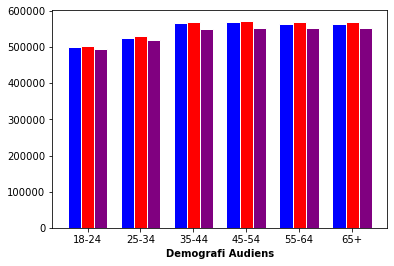

In [26]:
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = [df_1824_male.value_counts().sum(), df_2534_male.value_counts().sum(), df_3544_male.value_counts().sum(), df_4554_male.value_counts().sum(), df_5564_male.value_counts().sum(), df_65_older_male.value_counts().sum()]
bars2 = [df_1824_female.value_counts().sum(), df_2534_female.value_counts().sum(), df_3544_female.value_counts().sum(), df_4554_female.value_counts().sum(), df_5564_female.value_counts().sum(), df_65_older_female.value_counts().sum()]
bars3 = [df_1824_unk.value_counts().sum(), df_2534_unk.value_counts().sum(), df_3544_unk.value_counts().sum(), df_4554_unk.value_counts().sum(), df_5564_unk.value_counts().sum(), df_65_older_unk.value_counts().sum()]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color = "blue", width = barWidth, edgecolor = "white", label = "Male")
plt.bar(r2, bars2, color = "red", width = barWidth, edgecolor = "white", label = "Female")
plt.bar(r3, bars3, color = "purple", width = barWidth, edgecolor = "white", label = "Unknown")
 
# Add xticks on the middle of the group bars
plt.xlabel("Demografi Audiens", fontweight = "bold")
plt.xticks([r + barWidth for r in range(len(bars1))], ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"])
 
# Create legend & Show graphic
plt.show()

Dari grafik ini kita dapat mengetahui bahwa demografi audiens iklan kampanye politik di California didominasi olej orang-orang berusia lebih tua dari 35 tahun, terlepas dari jenis kelaminnya.

### Demografi Media Iklan Kampanye yang Digunakan

Untuk membuat grafik ini, kita akan hitung jumlah tipe iklan kampanye politik yang dilakukan di California:

In [27]:
df_media = df.ad_type.value_counts()

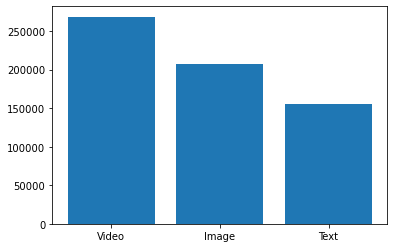

In [75]:
# Choose the height of the bars
height = df_media

# Choose the names of the bars
bars = ('Video', 'Image', 'Text')
x_pos = np.arange(len(bars))

# Create bars
plt.bar(x_pos, height)

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Show graphic
plt.show()

Dari grafik di atas, kita ketahui bahwa media video mendominasi iklan kampanye politik di California.

### Demografi Durasi Kampanye Berdasarkan Media

Untuk membuat grafik ini, kita akan memisahkan terlebih dahulu data berdasarkan media iklannya.

In [29]:
df_video = df.query("ad_type ==  'VIDEO'")
df_image = df.query("ad_type ==  'IMAGE'")
df_text = df.query("ad_type ==  'TEXT'")

Lalu kita akan ambil 10 durasi pengiklanan video, gambar, dan teks dengan frekuensi terbanyak untuk dijadikan grafik:

In [30]:
df_video.num_of_days.value_counts().head(10).reset_index()

,index,num_of_days
0,2,29405
1,1,25952
2,4,22070
3,3,21385
4,5,20183
5,6,16997
6,7,16098
7,8,14272
8,9,11376
9,11,10774


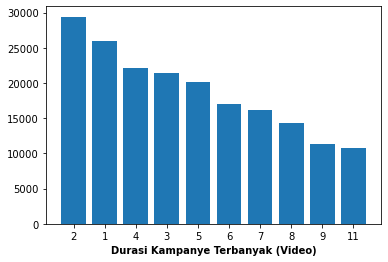

In [31]:
# Choose the height of the bars
height = df_video.num_of_days.value_counts().head(10)

# Choose the names of the bars
bars = ("2", "1", "4", "3", "5", "6", "7", "8", "9", "11")
x_pos = np.arange(len(bars))

# Create bars
plt.bar(x_pos, height)

# Create names on the x-axis
plt.xlabel("Durasi Kampanye Terbanyak (Video)", fontweight = "bold")
plt.xticks(x_pos, bars)

# Show graphic
plt.show()

In [32]:
df_image.num_of_days.value_counts().head(10).reset_index()

,index,num_of_days
0,1,17249
1,2,14130
2,4,11831
3,3,11090
4,5,10901
5,7,10092
6,6,9119
7,8,8408
8,12,7771
9,9,7093


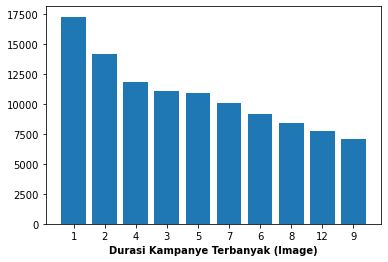

In [84]:
# Choose the height of the bars
height = df_image.num_of_days.value_counts().head(10)

# Choose the names of the bars
bars = ("1", "2", "4", "3", "5", "7", "6", "8", "12", "9")
x_pos = np.arange(len(bars))

# Create bars
plt.bar(x_pos, height)

# Create names on the x-axis
plt.xlabel("Durasi Kampanye Terbanyak (Image)", fontweight = "bold")
plt.xticks(x_pos, bars)

# Show graphic
plt.show()

In [34]:
df_text.num_of_days.value_counts().head(10).reset_index()

,index,num_of_days
0,1,15324
1,2,12922
2,3,8123
3,6,6681
4,4,6365
5,5,6018
6,7,5241
7,8,5170
8,9,4260
9,10,3921


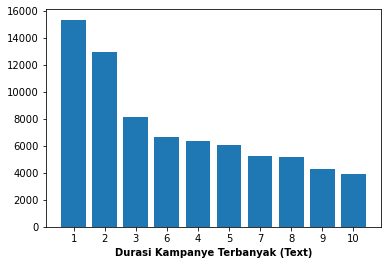

In [35]:
# Choose the height of the bars
height = df_text.num_of_days.value_counts().head(10)

# Choose the names of the bars
bars = ("1", "2", "3", "6", "4", "5", "7", "8", "9", "10")
x_pos = np.arange(len(bars))

# Create bars
plt.bar(x_pos, height)

# Create names on the x-axis
plt.xlabel("Durasi Kampanye Terbanyak (Text)", fontweight = "bold")
plt.xticks(x_pos, bars)

# Show graphic
plt.show()

Dari ketiga grafik di atas, kita ketahui bahwa umumnya iklan kampanye video dilakukan selama 2 hari, sedangkan iklan gambar dan teks umumnya berdurasi 1 hari.

### Demografi Impresi dengan Frekuensi Terbesar

Untuk membuat grafik ini, kita akan mengelompokkan data berdasarkan variabel `impressions`-nya.

In [73]:
df_impressions = df.groupby(by = "impressions")[["impressions"]].value_counts().reset_index()
df_impressions.rename(columns = {0 : "freq"}, inplace = True)
df_impressions.sort_values(by = "freq", ascending = False).head(10)

,impressions,freq
0,0-1000,262229
1,1000-2000,43063
2,10000-15000,27272
12,2000-3000,27235
21,3000-4000,19509
7,15000-20000,19132
28,4000-5000,15526
13,20000-25000,14582
35,5000-6000,12473
18,25000-30000,11580


In [76]:
# Choose the height of the bars
height = df_impressions.freq.sort_values(ascending = False).head(10)

# Choose the names of the bars
bars = ("0-1000", "1000-2000", "10000-15000", "2000-3000", "3000-4000", "15000-20000", "4000-5000", "20000-25000", "5000-6000", "25000-30000")
x_pos = np.arange(len(bars))

# Create bars
plt.bar(x_pos, height)

# Create names on the x-axis
plt.xlabel("Indeks Impresi", fontweight = "bold")
plt.xticks(x_pos, bars, rotation = 90)

# Show graphic
plt.show()

Dari grafik ini, kita ketahui bahwa mayoritas iklan kampanye yang dilakukan di California hanya memiliki indeks impresi sebesar 0-1000.

## Kesimpulan

Berikut adalah hal-hal yang dapat saya laporkan kepada Mr. X terkait pengolahan data berikut:

1. Pembuatan iklan kampanye utamanya harus menyasar ke audiens berusia 35 tahun keatas, meskipun membuat iklan kampanye yang dapat diterima oleh segala kalangan tetap lebih baik,
2. Iklan kampanye yang umum digunakan di California umumnya menggunakan media video,
3. Kampanye dengan media video umumnya berlangsung selama 2 hari, sedangkan untuk kampanye dengan menggunakan media gambar dan media teks hanya berlangsung selama 1 hari,
4. Umumnya iklan kampanye di California tidak memberikan impresi yang sangat tinggi, hanya mencapai nilai 1000 saja. Kalaupun kampanye berhasil, indeks impresinya kemungkinan hanya akan sebesar 15000-20000 saja,
5. Mr. X harus menyiapkan anggaran setidaknya sebesar 250 USD untuk membuat iklan kampanye,
6. Sesuai dengan kesimpulan nomor 5 dan uji hipotesis, 100 USD tidaklah cukup untuk melakukan produksi iklan kampanye politik di California.

Saran yang dapat saya berikan untuk kasus ini adalah:

1. Jangan berharap impresi dari iklan yang dilakukan akan menjulang tinggi,
2. Buat iklan kampanye yang dapat dicerna oleh semua kalangan dalam bentuk video,
3. Siapkan anggaran sebesar kurang lebih 250 USD untuk melakukan kampanye ini untuk mengantisipasi kalau diperlukan untuk membuat iklan kampanye dalam media lain,

## Penutup

Berikut laporan yang dapat saya berikan terkait dengan analisis ini. Semoga dapat dijadikan bahan pertimbangan untuk melakukan kampanye ini dengan seksama. Terima kasih, dan sampai jumpa di laporan selanjutnya.